In [1]:
import numpy as np 
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

Nombre d'enregistrements :  160
Nombre d'attributs :  6
Header :  b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Dec 22 21:07:21 2014'
Version :  1.0
Globals :  []


In [2]:
def load_data(nb_action, nb_sujet, nb_essai, data):
    try:
        file = loadmat("./imu_data/a{0}_s{1}_t{2}_inertial.mat".format(nb_action, nb_sujet, nb_essai))
        file_data = file['d_iner']
        for line in file_data:
            data["accéléromètre_X"].append(line[0])
            data["accéléromètre_Y"].append(line[1])
            data["accéléromètre_Z"].append(line[2])
            data["gyroscope_X"].append(line[3])
            data["gyroscope_Y"].append(line[4])
            data["gyroscope_Z"].append(line[5])
            data["id_sujet"].append(nb_sujet)
            data["id_essai"].append(nb_essai)
            data["id_action"].append(nb_action)
    except:
        print("fichier a{0}_s{1}_t{2}_inertial.mat manquant".format(nb_action, nb_sujet, nb_essai))

data = {
    "accéléromètre_X": [],
    "accéléromètre_Y": [],
    "accéléromètre_Z": [],
    "gyroscope_X": [],
    "gyroscope_Y": [],
    "gyroscope_Z": [],
    "id_sujet": [],
    "id_essai": [],
    "id_action": []
}

for action in range(1, 28):
    for sujet in range(1, 9):
        for essai in range(1, 5):
            # lire le contenu du fichier et l'ajouter au dataframe
            # appeler la fonction qui lit le fichier souhaité
            load_data(action, sujet, essai, data)

data = pd.DataFrame(data)
data.to_csv('imu_data.csv')

fichier a8_s1_t4_inertial.mat manquant
fichier a23_s6_t4_inertial.mat manquant
fichier a27_s8_t4_inertial.mat manquant


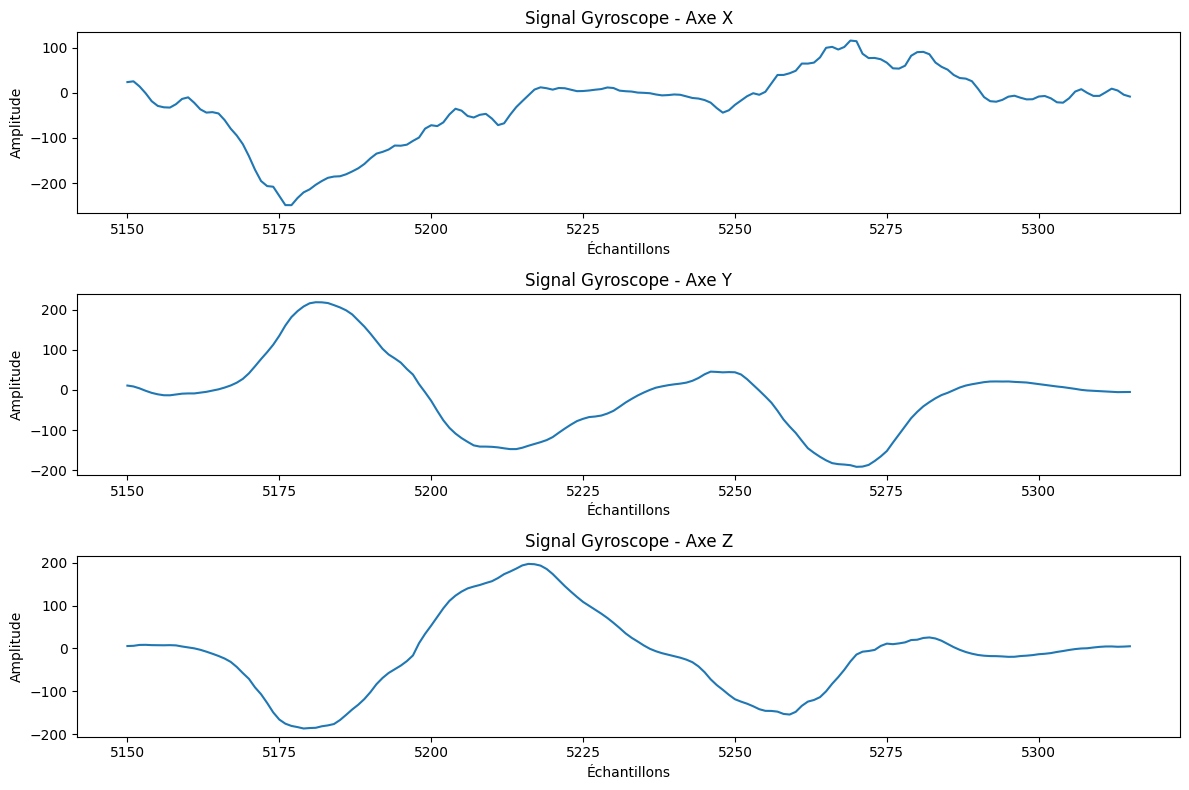

In [3]:
def tracer_signal(dataframe, capteur, num_action, num_sujet, num_essai):
    subset = dataframe[(dataframe['id_action'] == num_action) & 
                       (dataframe['id_sujet'] == num_sujet) & 
                       (dataframe['id_essai'] == num_essai)]

    if capteur == 1:  # Accéléromètre
        signal_x = subset['accéléromètre_X']
        signal_y = subset['accéléromètre_Y']
        signal_z = subset['accéléromètre_Z']
        capteur_name = 'Accéléromètre'
    elif capteur == 2:  # Gyroscope
        signal_x = subset['gyroscope_X']
        signal_y = subset['gyroscope_Y']
        signal_z = subset['gyroscope_Z']
        capteur_name = 'Gyroscope'
    else:
        print("Capteur non valide.")
        return

    # Créer un graphique pour chaque signal
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(signal_x)
    plt.title(f'Signal {capteur_name} - Axe X')
    plt.xlabel('Échantillons')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 2)
    plt.plot(signal_y)
    plt.title(f'Signal {capteur_name} - Axe Y')
    plt.xlabel('Échantillons')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 3)
    plt.plot(signal_z)
    plt.title(f'Signal {capteur_name} - Axe Z')
    plt.xlabel('Échantillons')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

# Exemple d'utilisation :
tracer_signal(data, capteur=2, num_action=2, num_sujet=1, num_essai=1)

In [7]:
# Partie 7 : Calcul des attributs (moyenne et écart-type pour l'instant)
# Chaque action aura un vecteur de 12 de long avec la moyenne et l'écart-type des 6 capteurs
def feature_extraction_moyenne(dataframe: pd.DataFrame):
    res = []
    # On cycle sur les 27 actions possibles (de 1 à 27)
    for num_action in range(1, 28):
        # Dataframe des lignes de l'action i
        subset = dataframe[(dataframe['id_action'] == num_action)]
        res.append([subset['accéléromètre_X'].mean(), 
                    subset['accéléromètre_Y'].mean(), 
                    subset['accéléromètre_Z'].mean(),
                    subset['gyroscope_X'].mean(),
                    subset['gyroscope_Y'].mean(),
                    subset['gyroscope_Z'].mean()
                    ])
    return res

def feature_extraction_ecart_type(dataframe: pd.DataFrame):
    res = []
    # On cycle sur les 27 actions possibles (de 1 à 27)
    for num_action in range(1, 28):
        # Dataframe des lignes de l'action i
        subset = dataframe[(dataframe['id_action'] == num_action)]
        res.append([subset['accéléromètre_X'].std(), 
                    subset['accéléromètre_Y'].std(), 
                    subset['accéléromètre_Z'].std(),
                    subset['gyroscope_X'].std(),
                    subset['gyroscope_Y'].std(),
                    subset['gyroscope_Z'].std()
                    ])
    return res

# Tests
moyennes = feature_extraction_moyenne(data)
for e in range(27):
    print(f"Moyennes de l'action {e+1} :", moyennes[e])

ecarts_types = feature_extraction_ecart_type(data)
for e in range(27):
    print(f"Ecart-types de l'action {e+1} :", ecarts_types[e])

Moyennes de l'action 1 : [-0.6811319089320388, -0.2584349889320388, -0.26932655067961164, 23.581163566601937, -2.182411626213592, -18.7310516576699]
Moyennes de l'action 2 : [-0.6126190778491172, -0.19636199578651686, -0.3409743206260032, -37.96528126565008, -17.45884847371589, 12.834058295545747]
Moyennes de l'action 3 : [-0.4273957590835869, -0.18090196008591372, -0.15865544818328262, 4.838609801682479, -6.917864121711116, -8.748782954179344]
Moyennes de l'action 4 : [-0.35102282224352827, -0.4879085098753595, -0.13331463873441993, 9.504567710642377, -5.060833034707573, -3.1918496983700866]
Moyennes de l'action 5 : [-0.5599456278557114, -0.2522696905811624, -0.07176077014028057, 22.49075861442886, 0.9906469474949895, -2.8436108851703414]
Moyennes de l'action 6 : [-0.43857841794032026, -0.5510694612445415, -0.05162334461426492, 4.716568331695779, -8.770270124636099, 1.9044968149563322]
Moyennes de l'action 7 : [-0.41193458325238, -0.1850978739071304, -0.12245390907324655, -1.213341499